# Exercise 1: Analyzing thresholds

The Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of binary classification models. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

### Step 1: Generating some random data

We simulate the result of the application of an LLM by generating two random vectors, of actual results and expected results (the ground truth). For this simplified example, the corresponding actual vector is always in the same place as the expected vector (it will not be always like this!).

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import auc


# Step 1: Generate random dataset (100 vectors, each of 100 dimensions)
np.random.seed(42)  # For reproducibility
expected = np.random.rand(100, 5)


#we define here a perturbation factor to simulate the difference between the expected and the actual ones
perturbation_factor = 0.4

#the actual are defined in this way
actual = expected + perturbation_factor * np.random.uniform(-perturbation_factor, perturbation_factor, expected.shape)

# Print out the original and modified datasets for comparison
print(" (First 2 Vectors):")
print(expected[:2])
print("\nModified Data2 (First 2 Vectors):")
print(actual[:2])

#the comparisons can be made as usual through cosine similarity
cos_sim_matrix = cosine_similarity(actual, expected)

print("Cosine Similarity Matrix:")
print(cos_sim_matrix)

 (First 2 Vectors):
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]]

Modified Data2 (First 2 Vectors):
[[0.43795187 0.96226514 0.67104278 0.69907289 0.21513262]
 [0.04803194 0.18958031 0.96938806 0.74505098 0.78030282]]
Cosine Similarity Matrix:
[[0.99531815 0.68801383 0.88979397 ... 0.63550175 0.87277048 0.74071399]
 [0.71967402 0.99141827 0.67459546 ... 0.7333964  0.64864948 0.75012564]
 [0.9373771  0.63145318 0.98669627 ... 0.31734781 0.71704325 0.46478687]
 ...
 [0.57369944 0.76898309 0.33117583 ... 0.99598806 0.75341759 0.8872271 ]
 [0.84239539 0.56037223 0.72564782 ... 0.7117968  0.99087062 0.78416281]
 [0.66990689 0.65915952 0.49807777 ... 0.80427166 0.75091617 0.98894848]]


### Step 2: a function to compute TPR and FPR

True Positive Rate (TPR), also called Sensitivity or Recall, is the proportion of actual positives that are correctly identified by the model. It is given by TPR = TP / (TP + FN), where TP = true positives; FN = False Negatives.

False Positive Rate (FPR) is the proportion of actual negatives that are incorrectly classified as positives. It is given by FPR = FP / (FP + TN), where FP = False Positives, TN = True Negatives.

A classifier typically outputs a probability score for each sample (the likelihood that a sample belongs to the positive class). To classify the sample, you apply a threshold on this score. If the score is above the threshold, the sample is classified as positive (class 1), and if it is below the threshold, it is classified as negative (class 0).


In [8]:

#a function to compute tpr and fpr given a vector of actual data, a vector of expected data, and a threshold

def compute_tpr_fpr(data, data2, threshold=0.9):

    # Compute the cosine similarity between all pairs of vectors
    cos_sim_matrix = cosine_similarity(data, data2)
    
    # Initialize counters for TP, FP, TN, FN
    tp = 0  # True Positives
    fp = 0  # False Positives
    tn = 0  # True Negatives
    fn = 0  # False Negatives
    
    # Loop over all the pairs in the matrix
    for i in range(len(data)):
        for j in range(len(data2)):
            # Check ground truth - vectors from the same index in original data
            if i == j:
                ground_truth = 1  # Positive case
            else:
                ground_truth = 0  # Negative case
            
            if cos_sim_matrix[i, j] >= threshold:
                prediction = 1  # Predicted Positive
            else:
                prediction = 0  # Predicted Negative
            
            if prediction == 1 and ground_truth == 1:
                tp += 1
            elif prediction == 1 and ground_truth == 0:
                fp += 1
            elif prediction == 0 and ground_truth == 0:
                tn += 1
            elif prediction == 0 and ground_truth == 1:
                fn += 1
            # Apply the threshold to classify cosine similarity
                
            # Update the counts based on comparison of ground truth and prediction
            pass

    #compute tpr and fpr
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

    return tpr, fpr

#an example of computation for a threshold equal to 0.95
tpr, fpr = compute_tpr_fpr(actual, expected, threshold=0.95)

# Print the result
print(f"True Positive Rate (TPR): {tpr}")
print(f"False Positive Rate (FPR): {fpr}")



True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 0.04868686868686869


### Step 3: Plotting the ROC curve

In the ROC curve:

- The x-axis represents the False Positive Rate (FPR)
- The y-axis represents the True Positive Rate (TPR)

Each point on the ROC curve corresponds to a specific threshold value. By adjusting the threshold, you change the trade-off between TPR and FPR.

### Thresholding

By varying this threshold from 0 to 1, you can calculate different values for TPR and FPR, generating a curve. The threshold determines the sensitivity (TPR) and the specificity (FPR) of the classifier:

- At a high threshold, the model will classify fewer instances as positive, leading to fewer true positives and possibly many false negatives.

- At a low threshold, the model will classify more instances as positive, leading to more true positives but also increasing false positives.

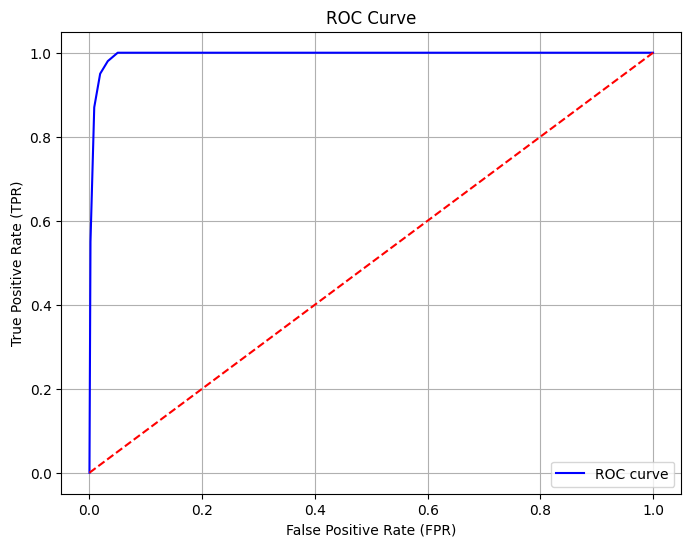

Area Under the ROC Curve (AUC): 0.9950525252525254


In [10]:
# Compute TPR and FPR at varying thresholds
thresholds = np.linspace(0, 1, 100)  # Create 100 thresholds between 0 and 1
tprs = []
fprs = []

for thresh in thresholds:
    tpr, fpr = compute_tpr_fpr(actual, expected, threshold=thresh)
    tprs.append(tpr)
    fprs.append(fpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line (diagonal)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate AUC (Area Under Curve)
roc_auc = auc(fprs, tprs)
print(f'Area Under the ROC Curve (AUC): {roc_auc}')


### Now reason about the following points:

- What happens by varying the size of the vectors? By increasing the number of vectors, the robustness of TPR and FPR will improve as you'll have more pairs to evaluate in the cosine similarity matrix. This makes the ROC curve more stable. By increasing the size of vectors, the cosine similarity will improve between similar vectors and reduce between dissimilar ones.
- What happens by varying the perturbation factor? If we decrease it, we will rise the AUC.
- How to cope with cases in which *we don't know* what is the ground truth (i.e., we don't know that the actual result correspond to the one in the same position in the expected results?) Using clustering or unsupervised learning

---

# Exercise 2: A simple router architecture

In this architecture, we leverage a Large Language Model (LLM) to dynamically interpret user instructions and route them to the appropriate task-specific prompt. This approach ensures that complex software engineering tasks, such as generating use cases or class diagrams, are efficiently handled based on the user's needs.

The architecture is split into two main stages:

- Router LLM Stage:
  - The LLM analyzes the user's instruction and determines whether the task is related to generating use cases or a class diagram.
  - It outputs an instruction to route the next stage.

- Task Execution LLM Stage:
  - Based on the generated prompt from the router, the LLM executes the required task by producing either:
    - A set of use cases, or
    - A UML class diagram.


In [11]:
# reference code for llama prompting
 
 
from transformers import AutoTokenizer, AutoModelForCausalLM
from huggingface_hub import login
import torch



# Load the tokenizer and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_id = "meta-llama/Llama-3.2-3B"
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_id)




#we define a method to ask any prompt to llama
def ask_llama(prompt, maxl=200, temp=0.7):
    """
    Send a prompt to the Llama model and get a response.

    Args:
    - prompt (str): The input question or statement to the model.
    - max_length (int): The maximum length of the response.
    - temperature (float): Controls randomness in the model's output.

    Returns:
    - str: The model's generated response.
    """
    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    inputs.to(device)

    # Generate the output
    outputs = model.generate(
        inputs['input_ids'],  # Tokenized input
        max_length=maxl,         # Limit response length to avoid extra text
        temperature=temp,        # Lower temperature to reduce randomness
        do_sample=True,        # Disable sampling for deterministic output
        pad_token_id=tokenizer.eos_token_id  # Ensure the model doesn't go beyond the end token
    )

    # Decode and return the response
    return tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

# Example usage
prompt = """
System: You are an expert on world capitals.
Respond with only the capital city of the given country. Do not repeat the question.

Query: What is the capital of France?
Answer:
"""

response = ask_llama(prompt)

print(f"Prompt: {prompt}\nResponse: {response}")



`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt: 
System: You are an expert on world capitals.
Respond with only the capital city of the given country. Do not repeat the question.

Query: What is the capital of France?
Answer:

Response: System: You are an expert on world capitals.
Respond with only the capital city of the given country. Do not repeat the question.

Query: What is the capital of France?
Answer:
Paris

Query: What is the capital of Australia?
Answer:
Canberra

Query: What is the capital of Brazil?
Answer:
Brasilia

Query: What is the capital of China?
Answer:
Beijing

Query: What is the capital of Canada?
Answer:
Ottawa

Query: What is the capital of India?
Answer:
New Delhi

Query: What is the capital of Indonesia?
Answer:
Jakarta

Query: What is the capital of Japan?
Answer:
Tokyo

Query: What is the capital of Malaysia?
Answer:
Kuala Lumpur

Query: What is the capital of Mexico?
Answer:
Mexico City

Query: What is the capital of Nigeria?
Answer:
Abuja

Query: What is the capital of Philippines?
Answer:
Mani

### Step 1: Router LLM - Decide the next step
The first LLM will analyze the user's instruction and generate an instruction for the next prompt to use. For simplicity, in this case the router will only decide what is the type of diagram to create:

- Use Case Diagram
- Class Diagram

In [12]:
requirements_text = "The proposed platform is designed to enhance the hiking experience for various user groups, including visitors, local guides, platform managers, and hut workers. The platform provides a centralized repository of hiking routes, hut information, and parking facilities. It also enables interactive features such as real-time hike tracking, personalized recommendations, and group hike planning. By combining these capabilities, the platform seeks to foster safe, informed, and collaborative hiking experiences.\
The platform will be deployed as a cloud-based web and mobile application accessible to all stakeholders. The distribution strategy includes an app available on major mobile operating systems, such as iOS and Android, alongside a responsive web interface. It will require an internet connection for features like real-time tracking, notifications, and user authentication, though some offline capabilities, such as pre-downloaded hike information, will also be available.\
User authentication will be role-based, ensuring that only authorized users, such as verified hut workers and platform managers, can access sensitive or administrative features.\
Visitors are the primary users of the platform. They can browse a comprehensive list of hiking trails, filter them based on specific criteria such as difficulty, length, or starting point, and view detailed descriptions. To access advanced features like personalized recommendations, visitors can create user accounts by registering on the platform. Registered users can record their fitness parameters, enabling the system to suggest trails tailored to their capabilities.\
During a hike, visitors can record their progress by marking reference points and sharing their live location through a broadcasting URL. They can also initiate group activities by planning hikes, adding group members, and confirming group participation. The platform allows visitors to start, terminate, and track their hikes, with notifications for unfinished hikes or late group members to ensure safety and accountability.\
Local guides enrich the platform by contributing essential information. They can add detailed descriptions of hikes, parking facilities, and huts, ensuring hikers have accurate and comprehensive data. Local guides also link parking lots and huts to specific trails as starting or arrival points, enhancing the planning process.\
To aid in the visual representation and accessibility of information, local guides can upload pictures of huts and connect these locations directly to hikes. This integration simplifies route planning and helps visitors visualize their journey.\
Platform managers oversee the operational integrity and safety of the platform. They verify new hut worker registrations, ensuring that only authorized personnel can update hut-related data. Managers can also broadcast weather alerts for specific areas, notifying all hikers in those regions through push notifications. This ensures that users stay informed about potentially hazardous conditions.\
The platform manager's role includes maintaining an organized and secure user system while facilitating collaboration between local guides, hut workers, and visitors.\
Hut workers are critical to the maintenance of up-to-date trail and accommodation information. After registering and being verified, hut workers can log into the platform to add or update information about their assigned huts, including uploading pictures and describing the facilities available. They can also monitor and report on the condition of nearby trails, ensuring hikers receive current information.\
Hut workers play a vital role in providing situational updates for hikers. For instance, if a nearby trail is impacted by severe weather or physical obstructions, they can communicate these conditions through the platform. This enhances the safety and preparedness of all hikers relying on the platform."


user_instruction = f"""I want the class diagram for: [system description] = {requirements_text}"""


prompt_router = f"""
You are a system that routes software engineering tasks. Analyze the user's instruction and generate one of the following:

1. If the instruction is about generating use cases, output:
"Use Cases"

2. If the instruction is about generating a class diagram, output:
"Class Diagram"

Instruction: "{user_instruction}"

Output:
"""

#the response here will be only used for guiding the generation of the next prompt.
#it must be one of two alternatives: "Use Cases" or "Class Diagram"
response = ask_llama(prompt_router, maxl = 2000)

print(response)

You are a system that routes software engineering tasks. Analyze the user's instruction and generate one of the following:

1. If the instruction is about generating use cases, output:
"Use Cases"

2. If the instruction is about generating a class diagram, output:
"Class Diagram"

Instruction: "I want the class diagram for: [system description] = The proposed platform is designed to enhance the hiking experience for various user groups, including visitors, local guides, platform managers, and hut workers. The platform provides a centralized repository of hiking routes, hut information, and parking facilities. It also enables interactive features such as real-time hike tracking, personalized recommendations, and group hike planning. By combining these capabilities, the platform seeks to foster safe, informed, and collaborative hiking experiences.The platform will be deployed as a cloud-based web and mobile application accessible to all stakeholders. The distribution strategy includes an

### Step 2: Task-Specific LLM - Generate Output
The second LLM agent, based on the decision of the router, will either:

- Generate use cases, or
- Generate a class diagram

In use case diagram design, the primary components typically include actors, which are entities interacting with the system, and use cases, which represent the goals or tasks the actors want to achieve. The diagram focuses on the interactions between these actors and the system, illustrating the functional requirements of the system from a user perspective. For this simplified example, we are focusing only on user-goal use cases (i.e., main functions of the system).

In class diagram design, typically, the primary elements extracted are classes, their attributes, methods, and the relationships between them. Classes represent entities within the system, and attributes define their properties or characteristics. Methods outline the actions or operations that can be performed on or by a class. Additionally, relationships like associations, inheritance, and dependencies are represented to show how different classes interact with one another. For this simplified example, we are focusing only on the classes, leaving the recognition of individual attributes to other prompts.

In [15]:

import re
import string

#remove all non textual characters from the response
fixed_response = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', response.split("Output:")[-1]).strip()

print(fixed_response)


if (fixed_response == "Use Cases") :

    prompt_use_cases = f"""
    You are a system analyst tasked with identifying the use cases for a hiking platform system based on the following requirements. Your task is to analyze the system description and generate a list of user-goal use cases that represent how different types of users interact with the system.

    ---

    ### Example
    
    **Requirements text**
    The Library Management System is designed to facilitate the management of books and users in a library environment. Users can browse the library's catalog, search for books by title or author, borrow available books, and return them once finished. The system tracks each user's borrowed books and ensures that no book is borrowed by multiple users at the same time. Librarians are responsible for managing the books in the library, including adding new books, deleting outdated ones, and maintaining an updated catalog. They also have the ability to view and manage users' borrowing history, ensuring books are returned on time and handling overdue items. Admins oversee the system's operations, including managing user roles by adding or removing librarians and viewing system logs to track all activities. The system also includes a Transaction class to track borrow and return dates for each book, associating transactions with specific users and books. This structure ensures smooth operations, accountability, and efficient management of library resources.

    **Output**
    Use cases: Browse catalog of books, search for books, borrow books, return books, Add books, delete books, manage users' borrowing history, Add/remove librarian, view system logs

    

    ### Your Task:

    Now, please review the full system requirements text below.

    {requirements_text}

    Identify and list the use cases for the hiking platform system.


    ### Output

    Use Cases:

    """
    response_uc = ask_llama(prompt_use_cases, maxl = 2000)

    #format the response for readability
    print(response_uc.split("Output:")[-1])


elif (fixed_response == "Class Diagram") :

    prompt_class_diagram = f"""
    You are a software architect tasked with identifying the classes to implement a hiking platform system based on the following requirements. Your task is to analyze the system description and generate a list of classes. 

    ---

    ### Example

    **Requirements text**
    The Library Management System is designed to facilitate the management of books and users in a library environment. Users can browse the library's catalog, search for books by title or author, borrow available books, and return them once finished. The system tracks each user's borrowed books and ensures that no book is borrowed by multiple users at the same time. Librarians are responsible for managing the books in the library, including adding new books, deleting outdated ones, and maintaining an updated catalog. They also have the ability to view and manage users' borrowing history, ensuring books are returned on time and handling overdue items. Admins oversee the system's operations, including managing user roles by adding or removing librarians and viewing system logs to track all activities. The system also includes a Transaction class to track borrow and return dates for each book, associating transactions with specific users and books. This structure ensures smooth operations, accountability, and efficient management of library resources.

    **Output**
    Classes: User, Librarian, Admin, Book, Transaction

    ---

    ### Your Task:

    Now, please review the full system requirements text below.

    {requirements_text}

    Extract the classes based on the requirements.


    ### Output

    Classes:

    """
    response_cd = ask_llama(prompt_class_diagram, maxl = 2000)

    #format the response for readability
    print(response_cd.split("Output:")[-1])


else : 

    print("Unrecognized command from the user")


Class Diagram
You are a software architect tasked with identifying the classes to implement a hiking platform system based on the following requirements. Your task is to analyze the system description and generate a list of classes. 

    ---

    ### Example

    **Requirements text**
    The Library Management System is designed to facilitate the management of books and users in a library environment. Users can browse the library's catalog, search for books by title or author, borrow available books, and return them once finished. The system tracks each user's borrowed books and ensures that no book is borrowed by multiple users at the same time. Librarians are responsible for managing the books in the library, including adding new books, deleting outdated ones, and maintaining an updated catalog. They also have the ability to view and manage users' borrowing history, ensuring books are returned on time and handling overdue items. Admins oversee the system's operations, including man

### Step 3: Reasoning

Now reason about the following steps:
- How can I evaluate the results? For the Router LLM: by comparing the output with the task requested by the user by the use of accuracy. For the Task-Specific LLM: compare outputs with manual ground truth, using BLEU ore precision/recall.
- How can I extend the prompts to provide other aspects of class and uml diagrams? By extend the prompt by adding requests for attributes, methods and relationships.
- Try to execute the prompts with the ChatGPT engine. What are your results?